# **Google Play Store Data Analysis**

Author : **Munaza Irshad**

Email : [mnzirshad@gmail.com](link)

Linkedin : [https://www.linkedin.com/in/munaza-i-8b1418194/](link)

Code Submission Date : 21-07-2024

## About Dataset

>- ***Description***\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

> - ***Context :***
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

>- ***Content :***
Each app (row) has values for catergory, rating, size, and more.

>- ***Acknowledgements :***
This information is scraped from the Google Play Store. This app information would not be available without it.

>- ***Inspiration :***
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

### **1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline

### **2. Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [107]:
gps_data = pd.read_csv('google_play_store.csv')

- Lets have a look on top 5 rows of data

In [3]:
gps_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


- Important Things to know

> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [4]:
# set options to be maximum for rows and columns

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# hide all warnings

import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [5]:
print(f'All the columns Names in this Data Set are as follow: {gps_data.columns}')

All the columns Names in this Data Set are as follow: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


- Total Number of Rows and Columns

In [6]:
print(f'The Number of Rows are {gps_data.shape[0]} and the Number of Columns are {gps_data.shape[1]}')

The Number of Rows are 10841 and the Number of Columns are 13


- Let's have a look on the shape of the dataset

In [7]:
gps_data.shape

(10841, 13)

Not enough, let's have a look on the columns and their data types using detailed info function

In [8]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - 'Size', 'Installs', 'Price'

In [9]:
gps_data.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [10]:
gps_data['Size'].isnull().sum()

0

- Let's clean the 'Size' column first

No missing values in Size

In [11]:
#gps_data['Size'].value_counts()
gps_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### **Observations:**

1. varies with device
2. K
3. M

There are several uniques values in the '*Size*' column, we have to first make the unit into one common unit from M and K to bytes, and then remove the '*M*' and '*K*' from the values and convert them into numeric data type.

Verify the Number of Values and 3 different kind of values

In [12]:
# Finding the values having M in them

gps_data['Size'].loc[gps_data['Size'].str.contains('M')].value_counts().sum()

8830

In [13]:
gps_data['Size'].loc[gps_data['Size'].str.contains('M')].value_counts()

Size
11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
84M       9
89M       9
86M       8
1.0M      7
90M       6
Name: count, Length: 182, dtype: int64

In [14]:
# Finding the values having K in them

gps_data['Size'].loc[gps_data['Size'].str.contains('k')].value_counts().sum()

316

In [15]:
# Finding the values having 'Varies with Device' in them

gps_data['Size'].loc[gps_data['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [16]:
# Total Values in Size column
gps_data['Size'].value_counts().sum()

10841

In [17]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8829+316+1695

10840

In [18]:
len(gps_data)

10841

- We have *8830* values in *M* units
- We have *316* values in *k* units
- We have *1695* value in *Varies with device* 

> Let's convert the *M* and *K* units into bytes and then remove the *M* and *K* from the values and convert them into numeric data type.

In [19]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric

def convert_size(size):
    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k', ''))* 1024
        elif 'M' in size:
            return float(size.replace('M', ''))* 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [20]:
# lets apply function 

gps_data['Size']= gps_data['Size'].apply(convert_size)

In [21]:
gps_data['Size']

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

In [22]:
# Rename the Column
gps_data.rename(columns={'Size' : 'Size_in_bytes'}, inplace=True)

In [23]:
gps_data.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


- Replace any non Numeric character with empty string

In [24]:
#gps_data['size_in_bytes'] = gps_data['size_in_bytes'].replace({'\D': ''}, regex=True).astype(float)

In [25]:
gps_data['Size_in_bytes']

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size_in_bytes, Length: 10841, dtype: float64

- New Column of Size in Mb

In [26]:
# gps_data['Size_in_Mb'] = gps_data['size_in_bytes'].apply(lambda x : x/ 1024 * 1024)
gps_data['Size_in_Mb'] = gps_data['Size_in_bytes'] / (1024 * 1024)

- New Column of Size in kb

In [27]:
# gps_data['Size_in_kb'] = gps_data['size_in_bytes'].apply(lambda x : x/ 1024)
gps_data['Size_in_kb'] = gps_data['Size_in_bytes']/ 1024

In [28]:
gps_data.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,2867.2


- Now we have converted every value into bytes and removed the *M* and *K* from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the *Installs* column

### Installs Column

In [29]:
# check the unique values in size column
gps_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [30]:
# let's have a values counts
gps_data['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [31]:
# Number of Missing Values in Install
gps_data['Installs'].isnull().sum()

0

Have not any Null Value so good to go

In [32]:
# find how many values has '+' in it
gps_data['Installs'].loc[gps_data['Installs'].str.contains('\+')].value_counts().sum()

10840

In [33]:
# Total values in Installs column
gps_data['Installs'].value_counts().sum()

10841

- The only problem I see here is the **+** sign in the values, let's remove them and convert the column into numeric data type.

- The total values in the *Installs* column are *10841* and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign **+** and **,** from the values and convert them into numeric data type

In [34]:
# remove the plus sign from install column and convert it to numeric

gps_data['Installs'] = gps_data['Installs'].apply(lambda x : x.replace('+', '') if '+' in str(x) else x)

In [35]:
# Let's verify if the `+` sign has been removed

gps_data['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             908
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: count, dtype: int64

In [36]:
# remove the comma sign from install column and convert it to numeric

gps_data['Installs'] = gps_data['Installs'].apply(lambda x : x.replace(',', '') if ',' in str(x) else x)

In [37]:
# Let's verify if the `,` sign has been removed

gps_data['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [38]:
# convert the install column to numeric (integers because this is the number of installs/count)

gps_data['Installs'] = gps_data['Installs'].apply(lambda x : int(x))

In [39]:
# Check Data Type
gps_data['Installs'].dtype

dtype('int64')

In [40]:
gps_data.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mb,Size_in_kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000,102400.000000


- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [41]:
# this will show the maximum value of the column
gps_data['Installs'].max() 

1000000000

In [42]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
gps_data['Installs_category'] = pd.cut(gps_data['Installs'], bins = bins, labels= labels )

In [43]:
 # check the value counts of the new column
gps_data['Installs_category'].value_counts()

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

### Lets have look on Price Column

In [44]:
# check values counts of price column
gps_data['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$19.90         1
$1.75          1
$14.00         1
$4.85          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [45]:
# Missing Values 
gps_data['Price'].isnull().sum()

0

No Missing Values found in Price Column

In [46]:
# Check Unique values
gps_data['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

- We need to confirm if the values in the *Price* column are only with $ sign or not

In [47]:
# calculate how many values have $ sign
gps_data['Price'].loc[gps_data['Price'].str.contains('\$')].value_counts().sum()

800

In [48]:
# This code counts the values in Price column which contains 0 but not contain a $ sign
gps_data['Price'].loc[(gps_data['Price'].str.contains('0')) & (~gps_data['Price'].str.contains('\$'))].value_counts().sum()

10041

- Now we can confirm that the only currency used is '$' in the *Price* column or '0' value, as '800+10041=10841 Total values'
- The only problem is '$' sign let's remove it and convert the column into numeric data type.

In [49]:
# Remove $ Sign

gps_data['Price'] = gps_data['Price'].apply(lambda x : x.replace('$', '') if '$' in str(x) else x)

In [50]:
# Verify $ Sign Removed
gps_data['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
19.90         1
1.75          1
14.00         1
4.85          1
1.04          1
Name: count, Length: 92, dtype: int64

In [51]:
# Convert into Numeric

gps_data['Price'] = gps_data['Price'].apply(lambda x : float(x))

In [52]:
# Verify Changed Data Type
gps_data['Price'].dtype

dtype('float64')

In [53]:
# Print min max and average prices of the app

print(f"The minimum price is: {gps_data['Price'].min()}")
print(f"The maximum price is: {gps_data['Price'].max()}")
print(f"The average price is: {gps_data['Price'].mean()}")

The minimum price is: 0.0
The maximum price is: 400.0
The average price is: 1.0272733142699015


### **2.1. Descriptive Statistics**

In [54]:
gps_data.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


### Observations:
---
- Now, we have only 7 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the *'Rating'* column has a minimum value of *'1'* and a maximum value of *'5'*, which is the range of rating, and the mean is '*4.19*'which is a good rating. On an average people give this rating.
- We can see that the *'Reviews'* column has a minimum value of '0' and a maximum value of *'78,158,306'* 78+ Millions, which is the range of reviews, and the mean is '*444,111.93'* which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.
  
Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.
---

### **2.2. Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

In [55]:
# Find total number of mising values
gps_data.isnull().sum().sum()

6570

In [56]:
# this will show the number of null values in each column in descending order
gps_data.isnull().sum().sort_values(ascending=False) 

Size_in_bytes        1695
Size_in_Mb           1695
Size_in_kb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

In [57]:
# find missing values percentage in data

round(gps_data.isnull().sum() / len(gps_data) * 100, 4).sort_values(ascending=False)

Size_in_bytes        15.6351
Size_in_Mb           15.6351
Size_in_kb           15.6351
Rating               13.5965
Current Ver           0.0738
Android Ver           0.0184
Type                  0.0092
App                   0.0000
Category              0.0000
Reviews               0.0000
Installs              0.0000
Price                 0.0000
Content Rating        0.0000
Genres                0.0000
Last Updated          0.0000
Installs_category     0.0000
dtype: float64

In [58]:
gps_data.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Size_in_kb           1695
Installs_category       0
dtype: int64

- Let's plot the missing values in the dataset

<Axes: >

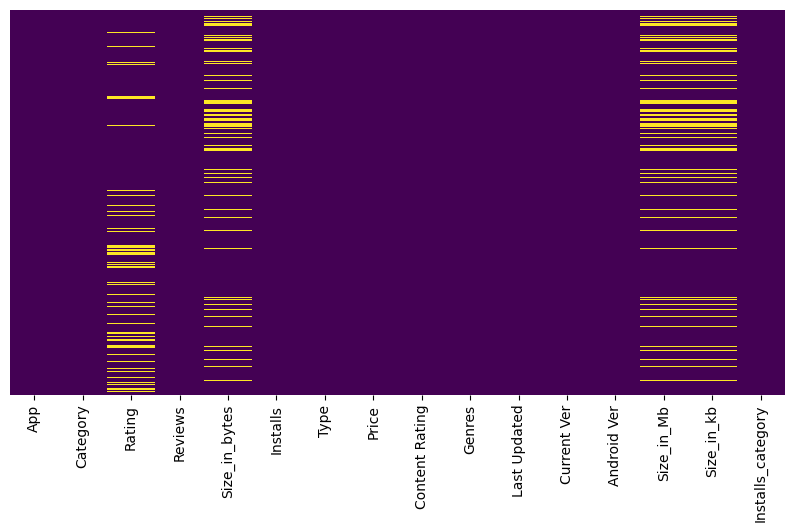

In [59]:
# Plot missing values

plt.figure(figsize=(10,5))
sns.heatmap(gps_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

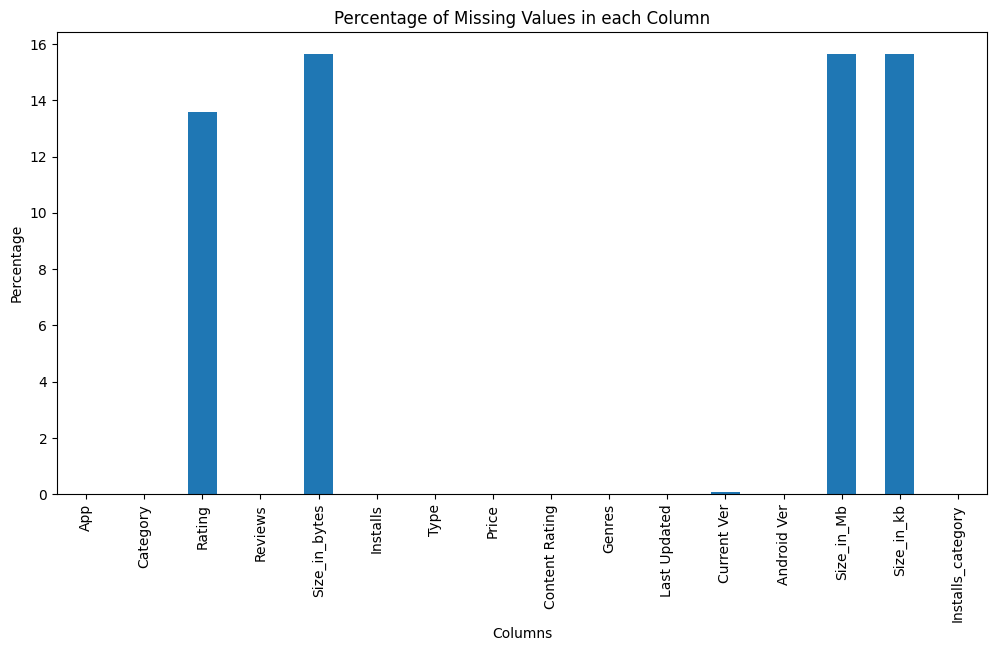

In [60]:
# make figure size
plt.figure(figsize=(12,6))

# plot the null values by their percentage in each column
missing_percentage = gps_data.isnull().sum() / len(gps_data) * 100
missing_percentage.plot(kind = 'bar')

# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

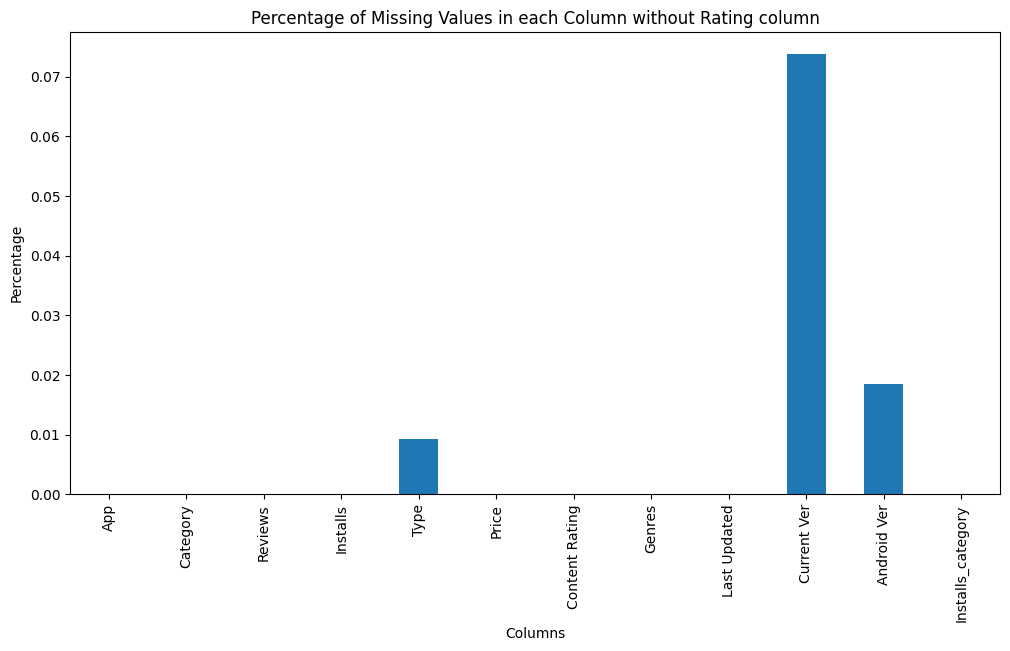

In [61]:
# percentage smaller than 1
plt.figure(figsize = (12,6))
missing_percentage[missing_percentage < 1].plot(kind = 'bar')
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column') 

### Observations:
---
- We have 1695 missing values in the *'Size_in_bytes'* and *'Size_in_Mb*' columns, which is *15.6%* of the total values in the column.
- We have 1474 missing values in the '*Rating*' column, which is *13.6%* of the total values in the column.
- We have 8 missing value in the '*Current Ver*' column, which is *0.07%* of the total values in the column.
- We have 2 missing values in the *'Android Ver'* column, which is *0.01%* of the total values in the column.
- We have only 1 missing value in '*Category*', '*Type*' and '*Genres*' columns, which is *0.009%* of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the '*Rating*' column as it is directly linked with the installation column. To test this Hypothesis we need to plot the '*Rating*' column with the '*Installs*' and '*Size*' columns and statistically test it using '*pearson correlation test*'.
---

- Let's run the correlations

<Axes: >

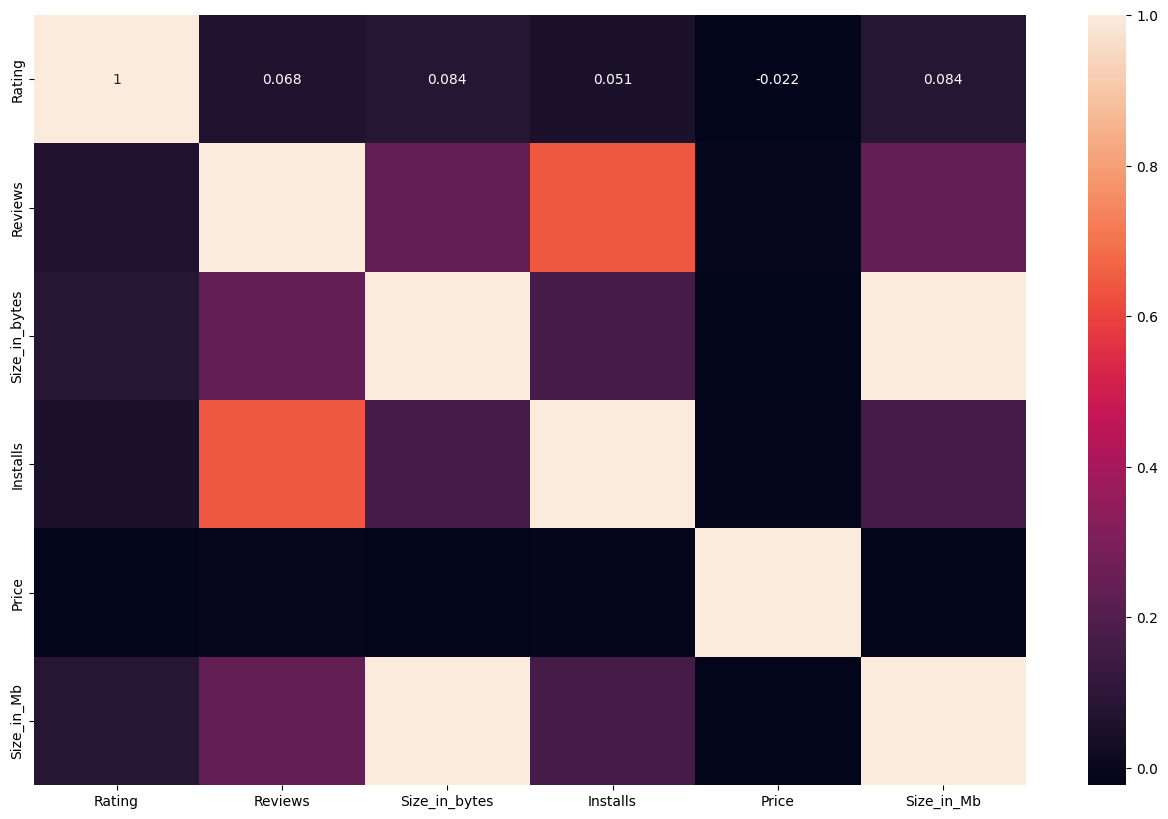

In [62]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_columns = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb']
sns.heatmap(gps_data[numeric_columns].corr(), annot = True)

In [63]:
# we can also calculate the correlation matrix using pandas
gps_data[numeric_columns].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [64]:
# we can calculate the pearson correlation coefficient using scipy as well as follows
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
gps_data_clean = gps_data.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(gps_data_clean['Reviews'], gps_data_clean['Installs'])
print(f"Pearson's R between Reviews ans Installs: {pearson_r:.4f}")


Pearson's R between Reviews ans Installs: 0.6262


---
### **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the *'Reviews'* column has a high correlation with the '*Installs*' column, which is '*0.64*' according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an app with *2* installs and we imputer the reviews with *1000* or via average reviews then it will be wrong.
- Installs is slightly correlated with '*Size_in_Mb*' or '*Size_in_bytes*' , which is *0.16*, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the '*Current Ver*', '*Android Ver*', '*Category*', '*Type*' and '*Genres*' columns, as they are very less in number and will not affect our analysis.

In [65]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(gps_data)}")

Length of the dataframe before removing null values: 10841


In [66]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
gps_data.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [67]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(gps_data)}")

Length of the dataframe after removing null values: 10830


- We have removed *11* rows having null values in the '*Current Ver*', '*Android Ver*','* Category*', '*Type*' and '*Genres*' columns.

In [68]:
# let's check the null values again
gps_data.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Size_in_kb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
### **Observations**
- Only '*Rating*' and '*Size_in_bytes*' or '*Size_in_Mb*' columns are left with missing values.
  - We know that we have to be carefull while deadling with '*Rating*' column, as it is directly linked with the '*Installs*' column.
  - In Size columns we already know about '*Varies with device*' values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [69]:
gps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Size_in_kb',
       'Installs_category'],
      dtype='object')

In [70]:
# use groupby function to find the trend of Rating in each Installs_category
gps_data.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1279.0,4.169195,0.827721,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [71]:
gps_data['Rating'].isnull().sum()

1469

In [72]:
# in which Install_category the Rating has NaN values
gps_data['Installs_category'].loc[gps_data['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

- Let's plot this and have a look

Text(7, 3.5, 'Null values: 0')

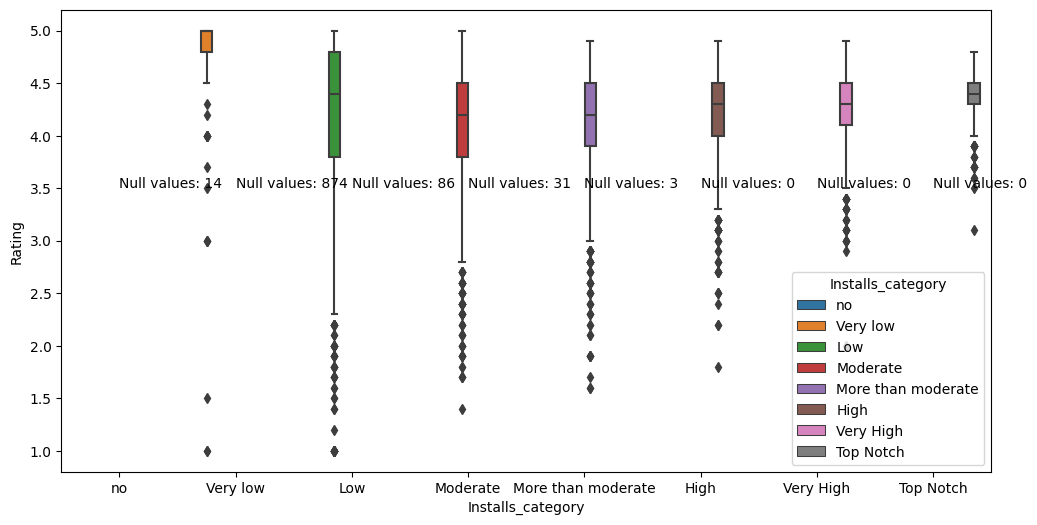

In [73]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize = (12, 6)) 
sns.boxplot(x = 'Installs_category', y = 'Rating', hue = 'Installs_category', data = gps_data) 
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Let's check if there is any similar link with Reviews as well

In [74]:
# in which Install_category the Rating has NaN values
gps_data['Installs_category'].loc[gps_data['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

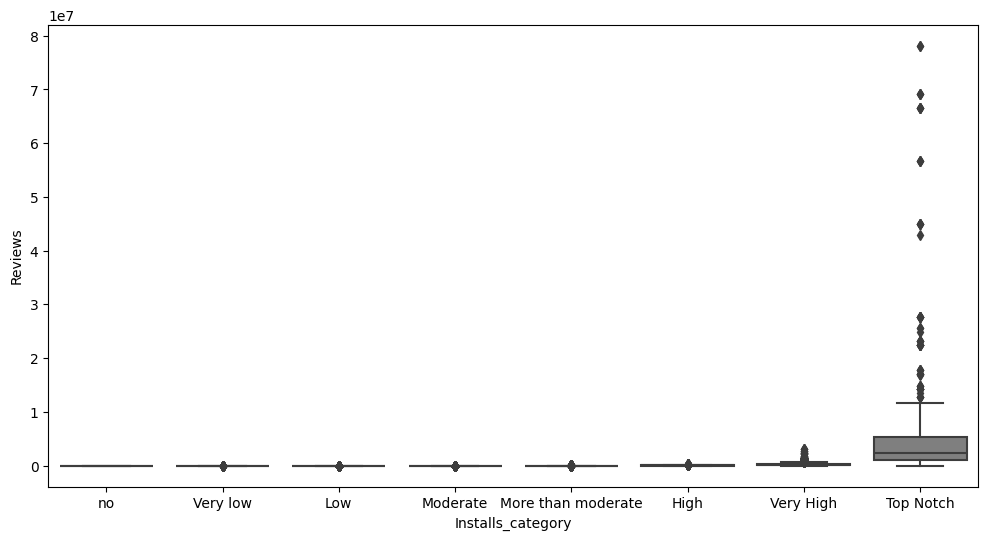

In [75]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize = (12, 6)) 
sns.boxplot(x ='Installs_category', y = 'Reviews', data = gps_data) 

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

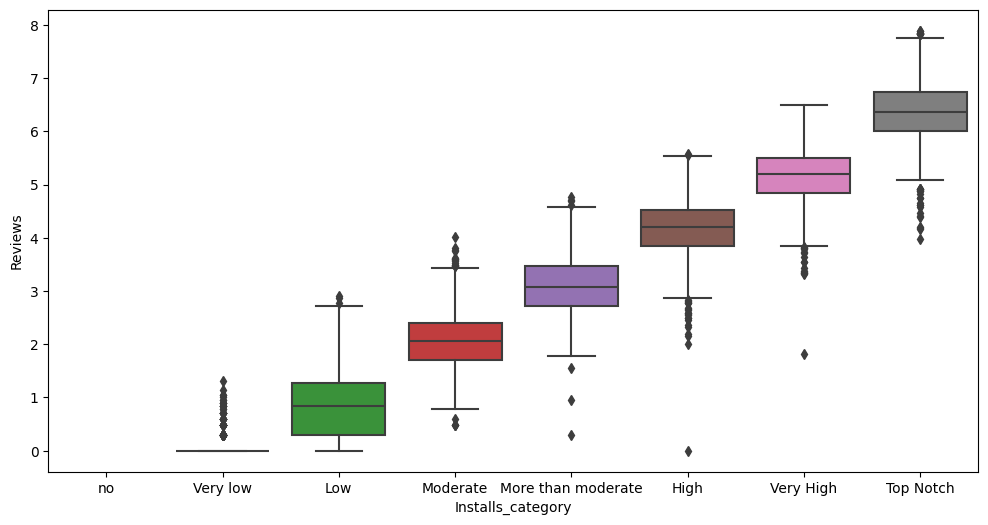

In [76]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize = (12, 6)) 
sns.boxplot( x='Installs_category', y = np.log10(gps_data['Reviews']), data = gps_data) 

- We also draw the scatter plot of the '*Rating*' and '*Review*' columns with the '*Installs*' column

<Axes: xlabel='Rating', ylabel='Reviews'>

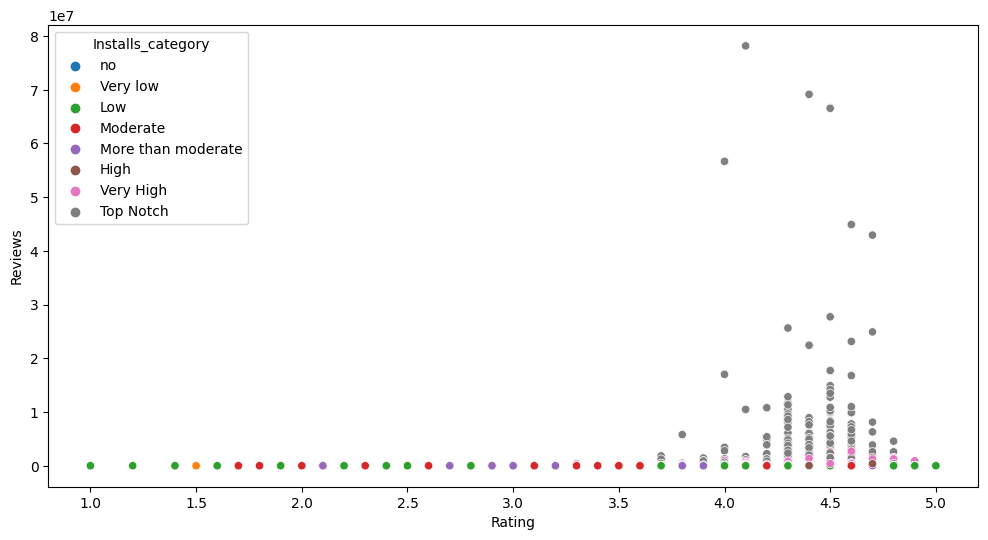

In [77]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize = (12, 6)) 
sns.scatterplot(x ='Rating', y = 'Reviews', hue = 'Installs_category', data = gps_data) 

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

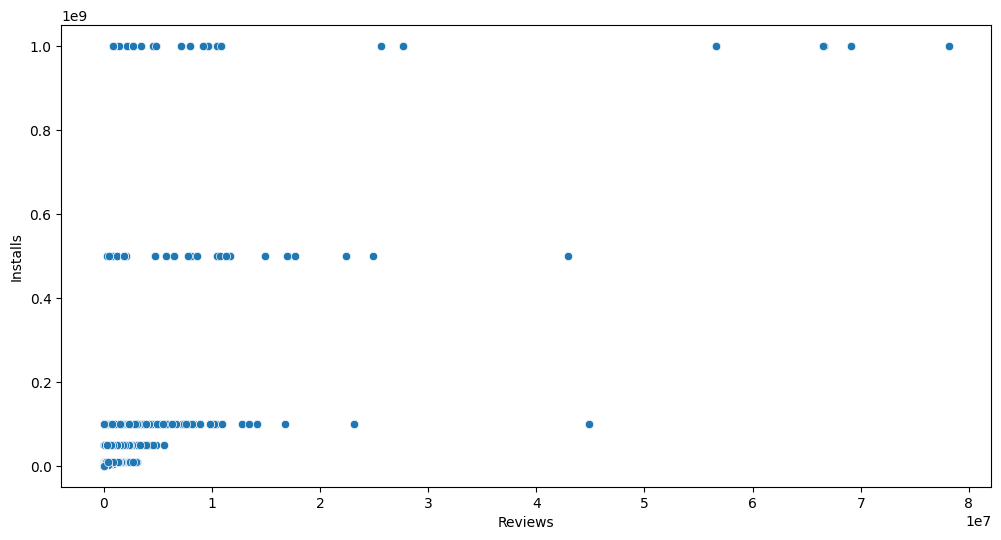

In [78]:
# plot reviews and installs in a scatter plot
plt.figure(figsize = (12, 6)) 
sns.scatterplot(x = 'Reviews', y = 'Installs', data = gps_data) 

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

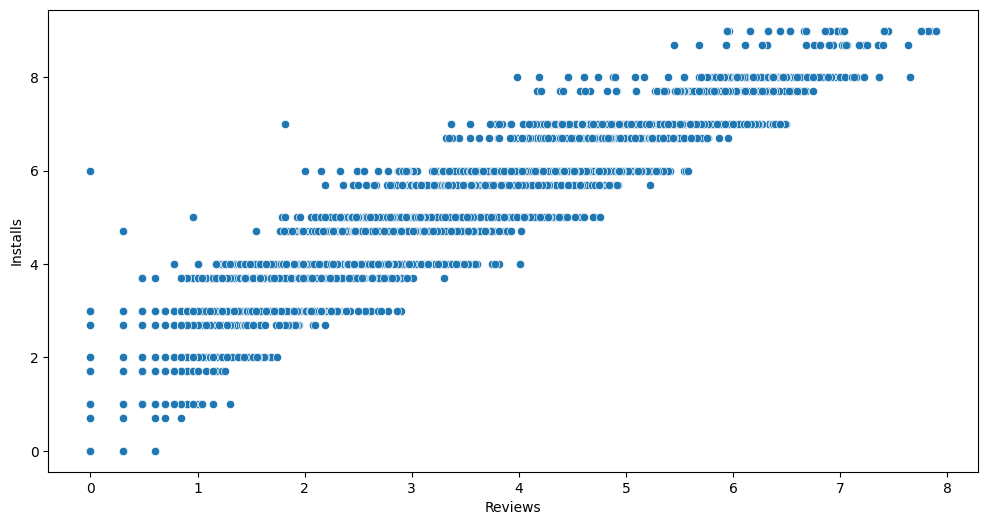

In [79]:
# plot reviews and installs in a scatter plot
plt.figure(figsize = (12, 6)) 
sns.scatterplot(x = np.log10(gps_data['Reviews']), y = np.log10(gps_data['Installs']), data = gps_data)

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discrete one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1200x600 with 0 Axes>

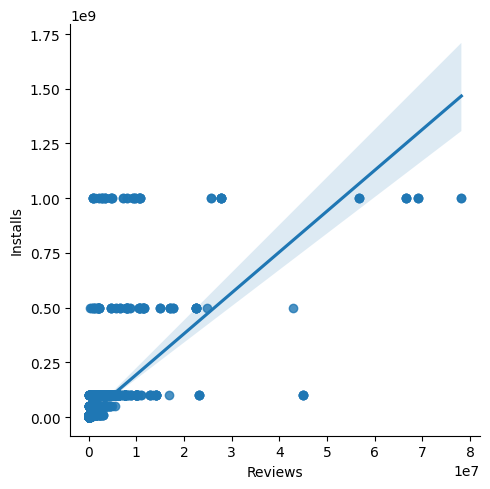

In [80]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize = (12, 6))
sns.lmplot(x = 'Reviews', y = 'Installs', data = gps_data) 


- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
### **Observation**
-We can see that most of the null values from '*Rating*' column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

### **2.3. Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [81]:
# find duplicate if any
gps_data.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [82]:
# find duplicate if any in the 'App' column
gps_data['App'].duplicated().sum()

1181

- Oops! we have 1181 duplicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [83]:
# let's check for number of duplicates
for col in gps_data.columns:
    print(f"Number of duplicates in {col} column are: {gps_data[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10797
Number of duplicates in Rating column are: 10790
Number of duplicates in Reviews column are: 4831
Number of duplicates in Size_in_bytes column are: 10374
Number of duplicates in Installs column are: 10810
Number of duplicates in Type column are: 10828
Number of duplicates in Price column are: 10738
Number of duplicates in Content Rating column are: 10824
Number of duplicates in Genres column are: 10711
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 8047
Number of duplicates in Android Ver column are: 10797
Number of duplicates in Size_in_Mb column are: 10374
Number of duplicates in Size_in_kb column are: 10374
Number of duplicates in Installs_category column are: 10822


This means that the only better way to find duplicates is to check for whole data

In [84]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {gps_data.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [85]:
# find exact duplicates and print them
gps_data[gps_data['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,3.8,3891.2,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,3.8,3891.2,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,26.0,26624.0,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,26.0,26624.0,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up,3.8,3891.2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2-Aug-18,Varies with device,Varies with device,NaN,NaN,Top Notch
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2-Aug-18,Varies with device,Varies with device,NaN,NaN,Top Notch
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,NaN,50000000,Free,0.00,Everyone,Travel & Local,2-Aug-18,Varies with device,Varies with device,NaN,NaN,Top Notch
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,39845888.0,10000000,Free,0.00,Everyone,Weather,6-Aug-18,Varies with device,Varies with device,38.0,38912.0,Very High


- Remove Duplicates

In [86]:
# remove the duplicates
gps_data.drop_duplicates(inplace=True)

In [87]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {gps_data.shape[0]}")

Number of rows after removing duplicates: 10347


- Now we have removed 482 duplicates from the dataset. and have 10347 rows left.

---

### **3. Insights from Data**

### **3.1. Which category has the highest number of apps?**

In [88]:
# which category has highest number of apps
gps_data['Category'].value_counts().head(10) 

Category
FAMILY             1939
GAME               1121
TOOLS               842
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### **3.2. Which category has the highest number of installs?**

In [89]:
# category with highest number of Installs
gps_data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452272905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### **3.3. Which category has the highest number of reviews?**

In [90]:
# Category with highest number of Reviews
gps_data.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181052
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

### **3.4. Which category has the highest rating?**

In [91]:
# Category with highest average Rating
gps_data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

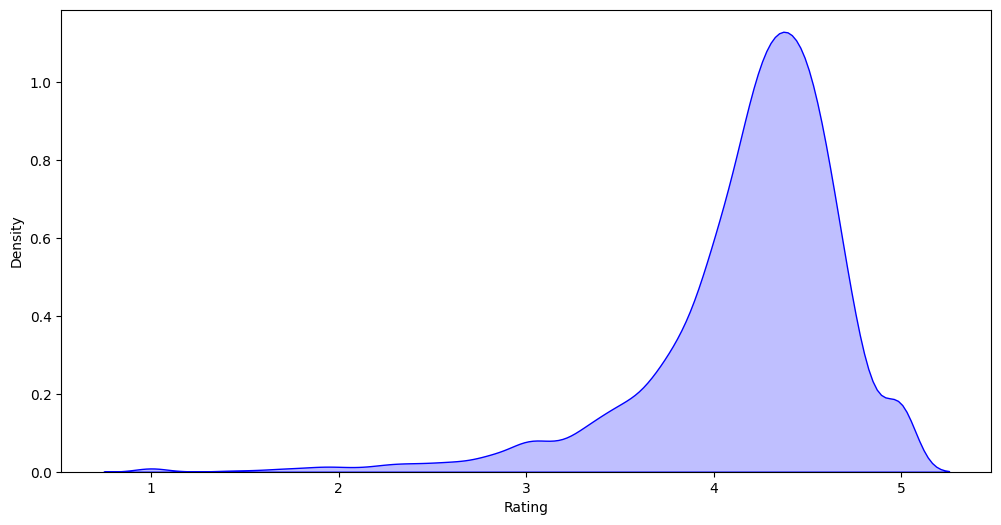

In [92]:
# plot the rating distribution
plt.figure(figsize = (12, 6)) 
sns.kdeplot(gps_data['Rating'], color = "blue", shade = True) 

<Axes: xlabel='Type', ylabel='Installs'>

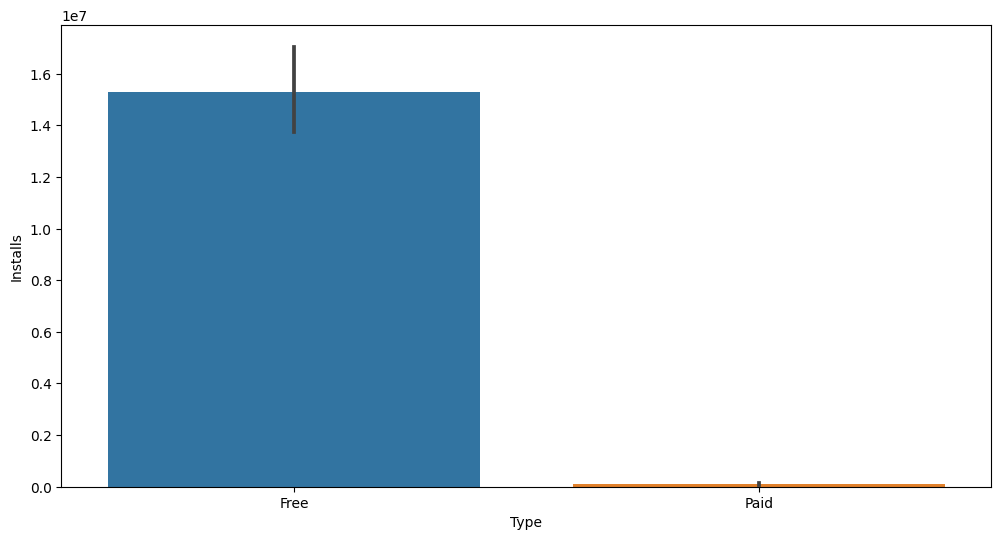

In [93]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize = (12, 6)) 
sns.barplot(x = 'Type', y = 'Installs', data = gps_data)

<Axes: xlabel='Installs', ylabel='Price'>

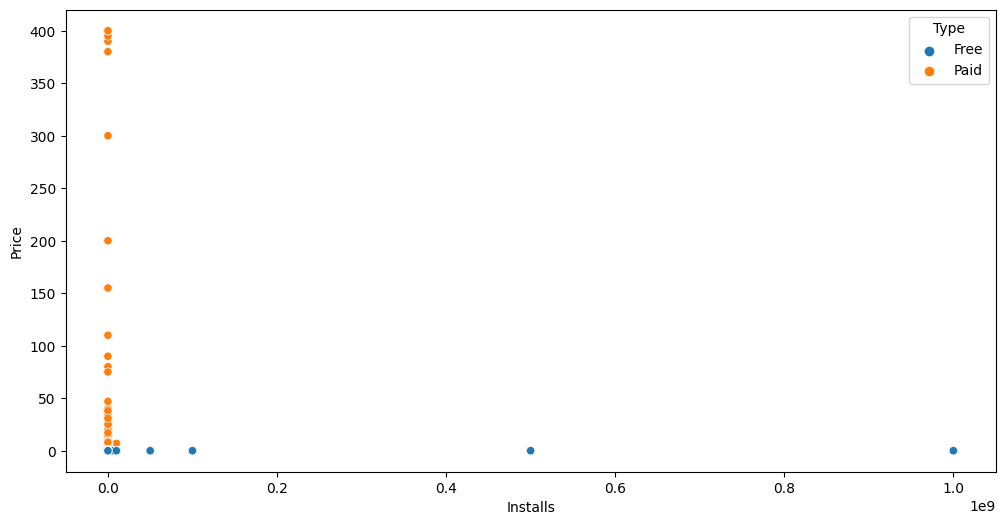

In [94]:
# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize = (12, 6)) 
sns.scatterplot(x = 'Installs', y = 'Price', hue = 'Type', data = gps_data) 

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

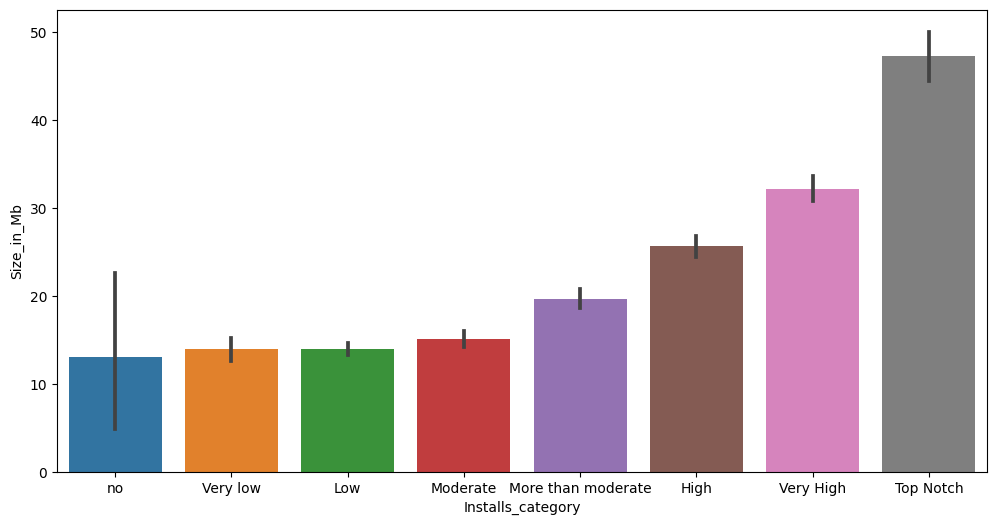

In [95]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize = (12, 6)) 
sns.barplot(x = 'Installs_category', y = 'Size_in_Mb', data = gps_data) 

In [96]:
# Which content rating is most popular in installs
gps_data['Content Rating'].value_counts() 


Content Rating
Everyone           8373
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

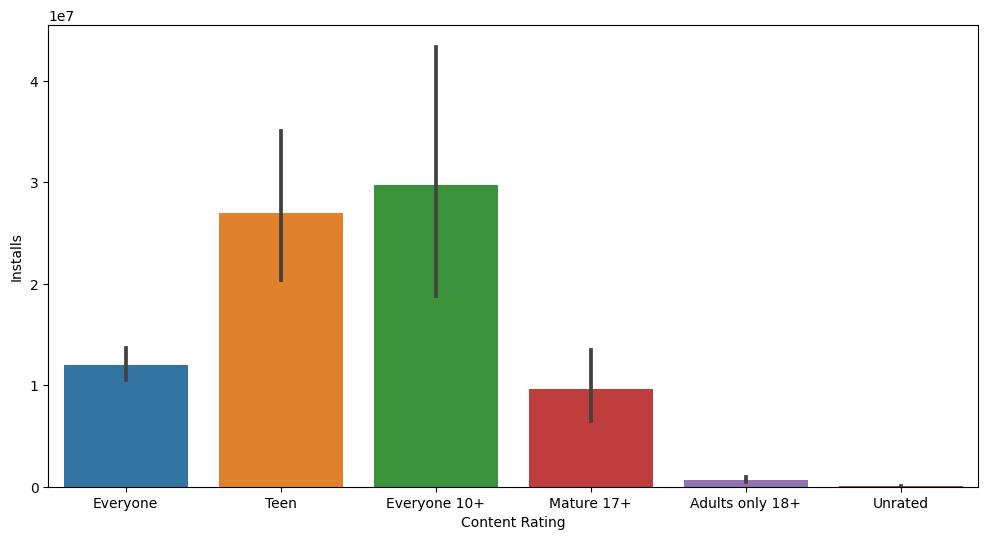

In [97]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize = (12, 6)) 
sns.barplot(x = 'Content Rating', y = 'Installs', data = gps_data) 

In [98]:
# find how many apps are there in Everyone content rating
gps_data['Category'].loc[gps_data['Content Rating'] == 'Everyone'].value_counts()


Category
FAMILY                 1498
TOOLS                   834
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

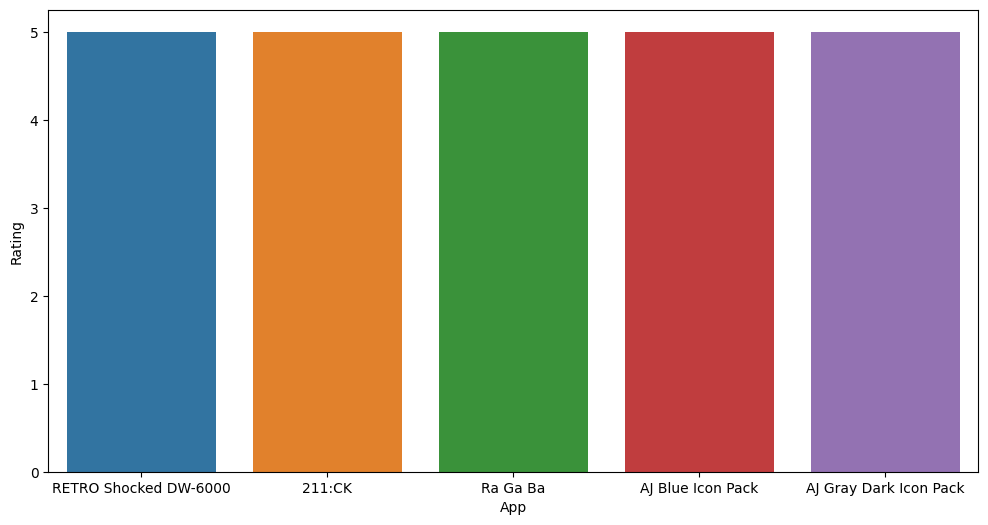

In [99]:
# plot top 5 rated paid apps
plt.figure(figsize = (12, 6)) 
sns.barplot(x = 'App', y = 'Rating', data = gps_data[gps_data['Type'] == 'Paid'].sort_values(by = 'Rating', ascending = False).head(5))

In [100]:
gps_data[gps_data['Type'] == 'Paid'].sort_values(by = 'Rating', ascending = False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Installs_category
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,512000.0,100,Paid,1.49,Everyone,Personalization,4-Apr-17,1.2,2.3 and up,0.488281,500.0,Low
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,11-Apr-18,1.3,4.1 and up,38.000000,38912.0,Very low
5917,Ra Ga Ba,GAME,5.0,2,20971520.0,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up,20.000000,20480.0,Very low
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,32505856.0,50,Paid,0.99,Everyone,Personalization,27-Apr-18,1.1,4.1 and up,31.000000,31744.0,Low
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2,36700160.0,10,Paid,0.99,Everyone,Personalization,29-Apr-18,1.1,4.1 and up,35.000000,35840.0,Very low


<Axes: xlabel='App', ylabel='Rating'>

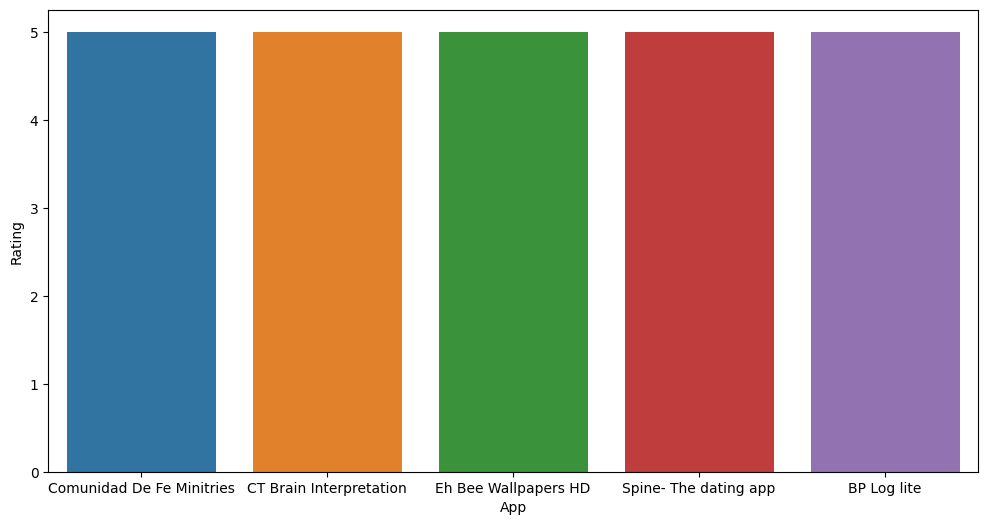

In [101]:
# plot top rated 5 apps in free category
plt.figure(figsize = (12, 6)) 
sns.barplot(x = 'App', y = 'Rating', data = gps_data[gps_data['Type'] == 'Free'].sort_values(by = 'Rating', ascending = False).head(5)) 

In [102]:
gps_data[gps_data['Type'] == 'Free'].sort_values(by = 'Rating', ascending = False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Installs_category
10326,Comunidad De Fe Minitries,LIFESTYLE,5.0,19,11534336.0,500,Free,0.0,Everyone,Lifestyle,1-Mar-18,1.1,4.1 and up,11.0,11264.0,Low
7865,CT Brain Interpretation,FAMILY,5.0,3,30408704.0,500,Free,0.0,Everyone,Education,4-Jul-18,5.0.16,4.0 and up,29.0,29696.0,Low
9365,Eh Bee Wallpapers HD,PERSONALIZATION,5.0,4,4089446.4,100,Free,0.0,Everyone,Personalization,24-Apr-18,1,4.1 and up,3.9,3993.6,Low
633,Spine- The dating app,DATING,5.0,5,9751756.8,500,Free,0.0,Teen,Dating,14-Jul-18,4,4.0.3 and up,9.3,9523.2,Low
6604,BP Log lite,LIFESTYLE,5.0,3,1572864.0,100,Free,0.0,Everyone,Lifestyle,15-Nov-14,1.1,2.2 and up,1.5,1536.0,Low


<Axes: xlabel='App', ylabel='Reviews'>

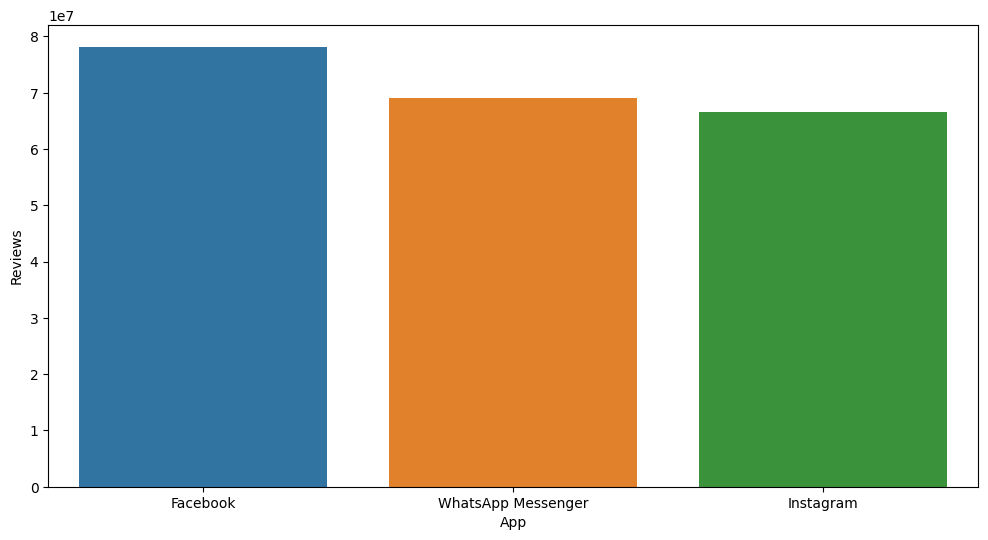

In [103]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize = (12, 6)) 
sns.barplot(x = 'App', y = 'Reviews', data = gps_data[gps_data['Type'] == 'Free'].sort_values(by = 'Reviews', ascending = False).head(5)) 

In [104]:
gps_data[gps_data['Type'] == 'Free'].sort_values(by = 'Reviews', ascending = False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device,NaN,NaN,Top Notch


<Axes: xlabel='App', ylabel='Reviews'>

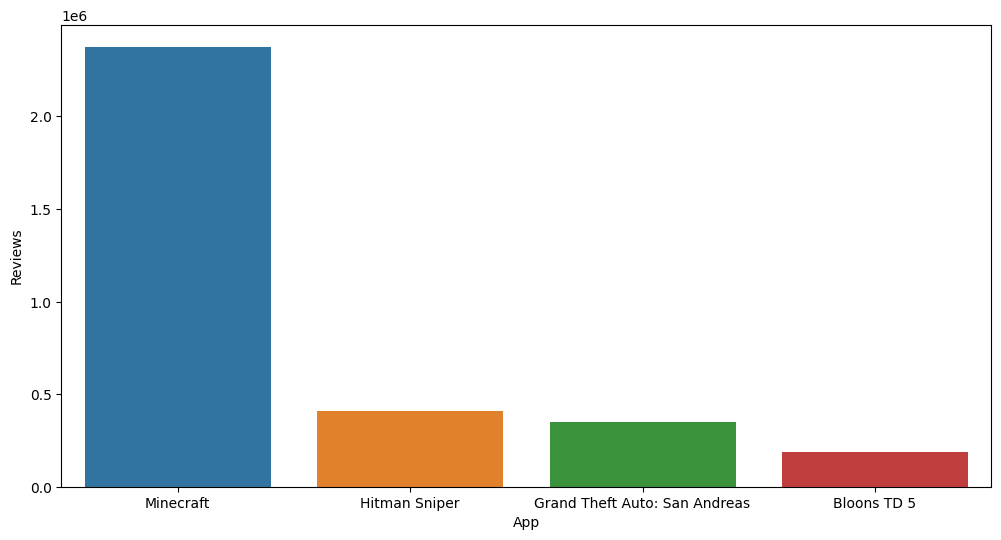

In [105]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize = (12, 6)) 
sns.barplot(x = 'App', y = 'Reviews', data = gps_data[gps_data['Type'] == 'Paid'].sort_values(by = 'Reviews', ascending = False).head(5)) 

In [106]:
# Store Cleaned Data in Excel File
gps_data.to_excel('Cleaned_google_play_store_Data.xlsx', index=False)